In [3]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import math
import numpy as np

import glob
from scipy.ndimage import zoom
import csv
import pandas as pd

In [ ]:
# load csv to sort brains into distinct MCI, CN, AD folders
c1 = pd.read_csv(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED\ADNI1_Annual_2_Yr_3T_3_01_2025.csv")
c2 = pd.read_csv(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED\ADNI1_Complete_1Yr_3T_3_01_2025.csv")
c3 = pd.read_csv(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED\ADNI1_Complete_3Yr_3T_3_01_2025.csv")

df1 = c1[["Group","Subject"]]
df2 = c2[["Group","Subject"]]
df3 = c3[["Group","Subject"]]

combined_df = pd.concat([df1, df2, df3], ignore_index=True)

print(sum(combined_df["Group"] == "MCI"))
print(sum(combined_df["Group"] == "AD"))
print(sum(combined_df["Group"] == "CN"))
print(len(combined_df["Group"]))

482
215
380
1077


In [ ]:
# extract all images in subfolders
def load_and_save_nifti_images(root_dir, output_dir, n1=0, n2=10_000, endswith='.nii.gz'):
    
    nii_files = glob.glob(root_dir+"/**/*"+endswith, recursive=True)
    images = []
    file_names = []
    image_count = 1
    print(len(nii_files))
    for nii_file in nii_files:
        try:
            img = nib.load(nii_file)
            images.append(img)


            file_name = nii_file.split("\\")[-1]

            output_path_file = os.path.join(output_dir, f"{image_count}_{file_name}")
            nib.save(img, output_path_file)

            image_count += 1
            file_names.append(file_name)

        except: 
            pass
    
    print(f"Extraction completed. Processed {image_count} images in total.")
    return file_names, images

In [ ]:
# extracting all images in subfolders or root_dir
#load_and_save_nifti_images(
#    root_dir=r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED",
#    output_dir=r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MIXED2", 
#    n1=0, n2=3000, endswith='.nii')

# Getting the subject_id to later seperate images into "disease folders"
MCI = combined_df[combined_df["Group"] == "MCI"]["Subject"].values
AD = combined_df[combined_df["Group"] == "AD"]["Subject"].values
CN = combined_df[combined_df["Group"] == "CN"]["Subject"].values

In [66]:
# split all files into their "disease folder"
root_dir = "C:/Users/kiran/Documents/_UIS/sem6/BACH/_test0/MIXED2/*.nii"
base_dir = "C:/Users/kiran/Documents/_UIS/sem6/BACH/_test0"
output_dir_AD = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD0"
output_dir_MCI = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MCI0"
output_dir_CN = r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0"


nii_files = glob.glob(root_dir, recursive=True)
for file in nii_files:
    subject_id = "_".join(file.split("\\")[-1].split("_")[2:5])
    filename = file.split("\\")[-1]
    #print(filename)
    
    out_dir = (
        output_dir_MCI if subject_id in MCI else
        output_dir_AD if subject_id in AD else
        output_dir_CN if subject_id in CN else None
    )
    if out_dir:
        img = nib.load(file)
        output_path = os.path.join(out_dir, filename + ".gz")
        nib.save(img, output_path)
        #print(out_dir, filename)
        print(f"Saved: {output_path}")
    else:
        print(f"{subject_id} not classified")
    


Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0\100_ADNI_032_S_0677_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080220105435721_S19889_I90942.nii.gz

Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0\101_ADNI_037_S_0303_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090313100252849_S30681_I138806.nii.gz

Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0\102_ADNI_037_S_0303_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080516103228596_S49752_I105924.nii.gz

Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0\103_ADNI_051_S_1123_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20090421114051834_S63819_I142107.nii.gz

Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MCI0\104_ADNI_067_S_0607_MR_MPR__GradWarp__B1_Correction__N3__Scaled_2_Br_20081003160955509_S18034_I119204.nii.gz

Saved: C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\CN0\105_ADNI_116_S_0382_MR_MPR__GradWarp__B1_Correction__N3__Scaled_Br_20080117114012937_S33693_I87739.nii.gz

Sa

In [ ]:
# run on ubuntu/wsl, remember to open docker for it to be runnable 
# (you may have to adjust wsl ram up to a few billion over what your computer has, that somehow fixes the problem of running out of ram, xd?):
# Skull removal
cd "/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/_test0" # cd into the folder above
input_folder="/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/_test0/NORMAL0"
output_folder="/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/_test0/NORMAL1"

# mkdir -p "$output_folder"  # Ensure output folder exists
for file in "$input_folder"/*.nii.gz; do
    filename=$(basename "$file")  # Extract the filename
    output_file="$output_folder/${filename%.nii.gz}2.nii.gz"  # Rename output
    echo "Processing: $file -> $output_file"
    ./synthstrip-docker -i "$file" -o "$output_file"
done

In [ ]:
# Spatial normalization
INPUT_DIR="/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/_test0/MCI1"
OUTPUT_DIR="/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/_test0/MCI2"
TEMPLATE="/mnt/c/Users/kiran/Documents/_UIS/sem6/BACH/DementiaMRI/Data/Pre-processed-CN/1_sub-ADNI002S0413_ses-M162_T1w2_norm.nii.gz"
mkdir -p "$OUTPUT_DIR"

process_file() {
    FILE="$1"
    BASENAME=$(basename "$FILE" .nii.gz)
    echo "Processing file: $FILE"
    echo "Base name: $BASENAME"


    flirt -in "$FILE" -ref "$TEMPLATE" -out "$OUTPUT_DIR/${BASENAME}_norm.nii.gz"

}

export -f process_file  # Export the function for parallel execution
find "$INPUT_DIR" -maxdepth 1 -type f -name "*.nii.gz" | while read FILE; do process_file "$FILE"; done

In [2]:
def plot_middle_slices_in_range(folder_path, n1, n2, axis=1, fig_size=(10,10)):
    "# Function to plot the middle slices of images between n1 and n2 in a single figure"
    # Get a sorted list of all files in the directory excluding mask files
    all_files = sorted(
        [f for f in os.listdir(folder_path) if f.endswith('.nii.gz') and not f.endswith('_mask.nii.gz')]
    )
    
    # Filter files between n1 and n2
    selected_files = all_files[n1:n2]
    num_images = len(selected_files)
    
    # Determine grid size for the plot
    cols = math.ceil(math.sqrt(num_images))  # Number of columns in the grid
    rows = math.ceil(num_images / cols)  # Number of rows in the grid
    
    # Create a figure for plotting
    fig, axes = plt.subplots(rows, cols, figsize=fig_size)
    axes = axes.flatten()  # Flatten to easily iterate over axes
    
    for i, file in enumerate(selected_files):
        file_path = os.path.join(folder_path, file)
        
        # Load the NIfTI file
        img = nib.load(file_path)
        img_data = img.get_fdata()
        
        # Calculate the middle index along axis 0
        middle_index = img_data.shape[axis] // 2
        
        # Plot the middle slice on the current axis
        axes[i].imshow(img_data[middle_index, :, :].T, cmap='gray', origin="lower")
        axes[i].set_title(file_path.split("\\")[-1].split("_")[0], fontsize=8)
        axes[i].axis('off')
    
    # Hide unused axes if the grid is larger than the number of images
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

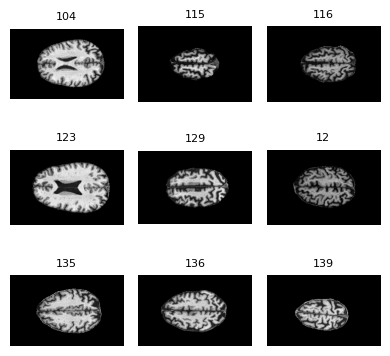

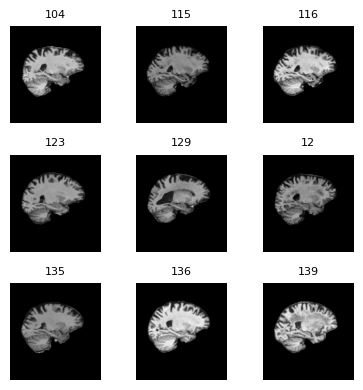

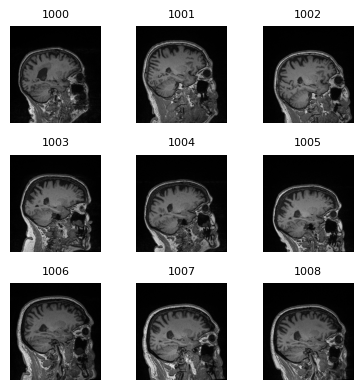

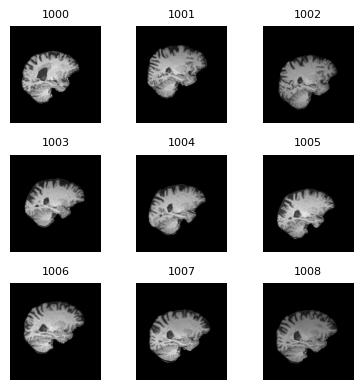

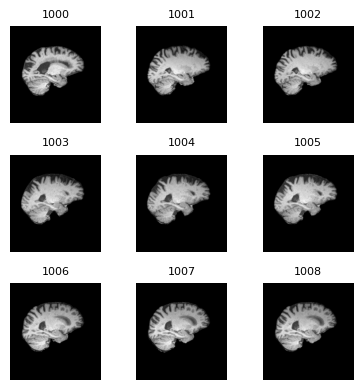

In [6]:

# plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD0", 0, 9, 2, fig_size=(4,4))
# plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD1", 0, 9, 2, fig_size=(4,4))
# plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\AD2", 0, 9, 2, fig_size=(4,4))

#plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MCI0", 0, 9, 2, fig_size=(4,4))
plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MCI1", 0, 9, 2, fig_size=(4,4))
plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\MCI2", 0, 9, 2, fig_size=(4,4))

plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\NORMAL0", 0, 9, 2, fig_size=(4,4))
plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\NORMAL1", 0, 9, 2, fig_size=(4,4))
plot_middle_slices_in_range(r"C:\Users\kiran\Documents\_UIS\sem6\BACH\_test0\NORMAL2", 0, 9, 2, fig_size=(4,4))
